<a href="https://colab.research.google.com/github/JeromeMberia/user_review_analysis/blob/main/user_review_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# PROBLEM STATEMENT 

## Specifying the question

Predict if each textual review is an exchange letters to a good review meaning the customer is happy alternatively a bad one meaning the customer is not satisfied.

## Defining the metric of success

## Understanding the context

## Recording the experimental design

## Data Relevance

# Natural Language Processing (NLP)

### Loading Libraries

In [118]:
#importing the libraries
import pandas as pd
import numpy as np
import string

# Importing the required libraries
# ---
#  
import wordninja 
from textblob import TextBlob

from sklearn.feature_extraction.text import CountVectorizer

import re
import string

from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer

import nltk

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction import text 
from wordcloud import WordCloud

from nltk.tokenize.treebank import TreebankWordDetokenizer

In [119]:
# Splitting concatenated words
# ---
# We can split concatenated words into separate words i.e. 'thathad' to 'that', 'had' 
# but we first need to install wordninja & textblob libraries which will allows us to do this operation.
# --- 
# 
!pip3 install wordninja

In [120]:
!pip3 install textblob

In [121]:
pip install nltk

In [122]:
pip install wordnet

In [123]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [124]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [125]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Data Loading

In [126]:
#uploading and readin the dataset
data = pd.read_csv("/content/user_review_data.csv")
data.head()

,review_body,star_rating
0,Good luck finding a reasonably priced band rep...,1
1,No i get dark on the first week with me!! I wi...,1
2,I dont know if mine was a mistake but it clear...,1
3,The rod that holds the bracelet broke several ...,1
4,"I bought 2 watches , one watch doesnot work at...",1


### Natural Language Processing

In [127]:
#checking the top 5 rows
data.head()

,review_body,star_rating
0,Good luck finding a reasonably priced band rep...,1
1,No i get dark on the first week with me!! I wi...,1
2,I dont know if mine was a mistake but it clear...,1
3,The rod that holds the bracelet broke several ...,1
4,"I bought 2 watches , one watch doesnot work at...",1


In [128]:
#checking the bottom 5 rows
data.tail()

,review_body,star_rating
14995,"I have a TAG Heuer carrera twin time watch, wh...",5
14996,It is hard sometimes to judge a product by its...,5
14997,reloj en perfecto estado llego todo a tiempo l...,5
14998,This is my third ironman. There are more expe...,5
14999,i use it everyday,5


In [129]:
#Getting the dataset shape.
data.shape

(15000, 2)

In [130]:
# Number of columns
data.shape[1]

2

In [131]:
# Number of rows
data.shape[1]

2

In [132]:
##Get the summary of this dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_body  15000 non-null  object
 1   star_rating  15000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 234.5+ KB


observation: our dataset comprise of object and integer datatype. both colunms has 15000 values, this is a clue of no missing values. 

In [133]:
#checking the body_review variable values
data['review_body'].sample(n=10, random_state=610)

3293     The delivery was prompt. I got the correct pro...
5328                                    not silent running
13737                                         good quality
3751     not happy<br /><br />  the band is very stiff ...
14280                                            Excellent
7552                 A backlight would be a useful feature
13104    So far so good with this product. My fiancée i...
11599    This is a nice watch, however it is a little h...
6004     IT IS OK. SEEMS TO BE A GOOD QUALITY. I RECOME...
2401     Similar to this watch. Undelivered to this dat...
Name: review_body, dtype: object

observation: the values comprises of words, symbols, panctuations and so on.

In [134]:
#Using groupby will check the data
data.groupby('star_rating').describe()

review_body  ...     
                  count  ... freq
star_rating              ...     
1                  3000  ...    3
2                  3000  ...    4
3                  3000  ...    7
4                  3000  ...   11
5                  3000  ...    8

[5 rows x 4 columns]

In [135]:
#previewing the dataset variables
data.columns

Index(['review_body', 'star_rating'], dtype='object')

observation: the two colunms are, review_body, and star_rating.

## Data cleaning

In [136]:
#Checking for duplicates
data.duplicated().sum()

439

observation: there are 439 duplicates.

In [137]:
#dropping the duplicates
data.drop_duplicates(inplace=True)
#
#confirming no duplicates
data.duplicated().any()

False

observation: duplicates have been dropped.

In [138]:
data.isnull().sum

<bound method DataFrame.sum of        review_body  star_rating
0            False        False
1            False        False
2            False        False
3            False        False
4            False        False
...            ...          ...
14995        False        False
14996        False        False
14997        False        False
14998        False        False
14999        False        False

[14561 rows x 2 columns]>

observation: there is no missing values

### Pre processing the data

Here we will check for remove any unnecessary variables/features/columns if any. other preprocessing procedures are tokenizing(spliting),stemming and lemmatization.

In [139]:
#checking for the missing values
data_corpus = data.copy()
data_corpus.head(10)

,review_body,star_rating
0,Good luck finding a reasonably priced band rep...,1
1,No i get dark on the first week with me!! I wi...,1
2,I dont know if mine was a mistake but it clear...,1
3,The rod that holds the bracelet broke several ...,1
4,"I bought 2 watches , one watch doesnot work at...",1
5,"This watch would have been fantastic, if it ha...",1
6,I have this watch. It looks and feels heavy du...,1
7,What the hell! I just got the watch today but ...,1
8,I am mechanically inclined but cannot get this...,1
9,It didnt work right out from the box. I had to...,1


finding rare words and splitting them

In [140]:
# Finding Rare Words
# --
data_corpus2= data_corpus.copy()
#
rare_words= pd.Series(' '.join(data_corpus2.review_body).split()).value_counts()[-100:]
rare_words

$32.00.         1
AQ47-7E         1
comfertable)    1
had.<br         1
Resist          1
               ..
stud.           1
target.<br      1
Longitude       1
reactors,       1
ots             1
Length: 100, dtype: int64

In [141]:


# Performing our splitting 
# 
data_corpus['review_body'] = data_corpus2.review_body.apply(lambda x: wordninja.split(str(TextBlob(x))))  
data_corpus['review_body'] = data_corpus2.review_body.str.join('')
print(data_corpus2[['review_body']].head())

                                         review_body
0  Good luck finding a reasonably priced band rep...
1  No i get dark on the first week with me!! I wi...
2  I dont know if mine was a mistake but it clear...
3  The rod that holds the bracelet broke several ...
4  I bought 2 watches , one watch doesnot work at...


In [142]:


def clean_text_round1(text):
  '''Remove HTML tags, remove punctuation, make text lowercase, remove punctuation and remove words containing numbers.'''
  text = re.sub('<.*?>','', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = text.lower()
  text = re.sub('\d', '', text)
  return text

fix = lambda x: clean_text_round1(x)
data_corpus['review_body'] = pd.DataFrame(data_corpus.review_body.apply(fix))
data_corpus

,review_body,star_rating
0,good luck finding a reasonably priced band rep...,1
1,no i get dark on the first week with me i will...,1
2,i dont know if mine was a mistake but it clear...,1
3,the rod that holds the bracelet broke several ...,1
4,i bought watches one watch doesnot work at a...,1
...,...,...
14995,i have a tag heuer carrera twin time watch who...,5
14996,it is hard sometimes to judge a product by its...,5
14997,reloj en perfecto estado llego todo a tiempo l...,5
14998,this is my third ironman there are more expen...,5


In [143]:
data_corpus['review_body'] = data_corpus['review_body'].apply(nltk.word_tokenize)

In [144]:
data_corpus['review_body']

0        [good, luck, finding, a, reasonably, priced, b...
1        [no, i, get, dark, on, the, first, week, with,...
2        [i, dont, know, if, mine, was, a, mistake, but...
3        [the, rod, that, holds, the, bracelet, broke, ...
4        [i, bought, watches, one, watch, doesnot, work...
                               ...                        
14995    [i, have, a, tag, heuer, carrera, twin, time, ...
14996    [it, is, hard, sometimes, to, judge, a, produc...
14997    [reloj, en, perfecto, estado, llego, todo, a, ...
14998    [this, is, my, third, ironman, there, are, mor...
14999                               [i, use, it, everyday]
Name: review_body, Length: 14561, dtype: object

In [145]:
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in text]

data_corpus['review_body'] = data_corpus['review_body'].apply(lemmatize_text)

In [146]:
data_corpus['review_body']

0        [good, luck, finding, a, reasonably, priced, b...
1        [no, i, get, dark, on, the, first, week, with,...
2        [i, dont, know, if, mine, wa, a, mistake, but,...
3        [the, rod, that, hold, the, bracelet, broke, s...
4        [i, bought, watch, one, watch, doesnot, work, ...
                               ...                        
14995    [i, have, a, tag, heuer, carrera, twin, time, ...
14996    [it, is, hard, sometimes, to, judge, a, produc...
14997    [reloj, en, perfecto, estado, llego, todo, a, ...
14998    [this, is, my, third, ironman, there, are, mor...
14999                               [i, use, it, everyday]
Name: review_body, Length: 14561, dtype: object

In [147]:
def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('english')]
data_corpus['review_body'] = data_corpus['review_body'].apply(lambda x:remove_stopword(x))

In [148]:
data_corpus_detokenize = data_corpus.copy()

data_corpus_detokenize['review_body'] = data_corpus_detokenize['review_body'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))

In [149]:
data_corpus['review_body'] = data_corpus['review_body'].apply(lambda x: ' '.join(x))

cv = CountVectorizer()
text_1 = cv.fit_transform(data_corpus['review_body'])

In [150]:
data_DTM = pd.DataFrame(text_1.toarray(), columns=cv.get_feature_names(), index=data_corpus.index)
data_DTM['star_rating'] = data_corpus2['star_rating']
data_DTM.head()


,aa,aaa,aaaaa,aaaaaand,aaahs,aaathe,aahing,aalk,ab,aback,abandon,abandoned,abb,abbreviation,abbreviationsthe,abc,abcd,abco,abd,abeast,abel,ability,abilityone,abit,ablack,able,abnormal,abnormally,aboitna,abomination,abort,abound,abouse,aboutbut,abouti,aboutit,aboutth,aboutthe,aboveeven,abovementioned,...,zenith,zeno,zenwatch,zeon,zeppelin,zero,zerodarkthirty,zeroing,zeroout,zerorize,zerostar,zest,zesus,zeus,zig,zillion,ziploc,ziplock,zipper,zippered,zippo,zissou,zodiac,zombie,zone,zonegot,zonesbut,zonethe,zonevisit,zoo,zooming,zulu,zumiez,zurich,ágil,ágora,él,ít,ñjjñlk,star_rating
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [151]:
data_DTM.star_rating.unique()

array([1, 2, 3, 4, 5])

In [152]:
data_DTM.shape

(14561, 20910)

In [170]:
from textblob import TextBlob

pol = lambda q: TextBlob(q).sentiment.polarity

data_corpus['polarity'] = data_corpus['review_body'].apply(pol)
data_corpus.head()

,review_body,star_rating,polarity
0,good luck finding reasonably priced band repla...,1,-0.090306
1,get dark first week never buy item buy,1,0.050000
2,dont know mine wa mistake clearly state aqua i...,1,-0.330000
3,rod hold bracelet broke several time company f...,1,0.100000
4,bought watch one watch doesnot work watch run ...,1,0.416667


In [171]:
negative = data_corpus[data_corpus['polarity'] < 0]
negative.head()

,review_body,star_rating,polarity
0,good luck finding reasonably priced band repla...,1,-0.090306
2,dont know mine wa mistake clearly state aqua i...,1,-0.330000
7,hell got watch today took box arm indicating t...,1,-0.125641
8,mechanically inclined get unit work watch trie...,1,-0.250000
10,wa worst purchase ever made amazon watch wa ok...,1,-0.200000


In [172]:
neutral = data_corpus[data_corpus['polarity'] == 0]
neutral.head()

,review_body,star_rating,polarity
16,recieved product watchband parched crackingthe...,1,0.0
17,hola gustaria saber que ha pasado con este rel...,1,0.0
31,doesnt work came battery set doesnt keep time ...,1,0.0
32,nope,1,0.0
36,got watch since one month ago working well del...,1,0.0


In [169]:
positive = data_corpus[data_corpus['polarity'] > 0]
positive.head()

,review_body,star_rating,polarity
1,get dark first week never buy item buy,1,0.050000
3,rod hold bracelet broke several time company f...,1,0.100000
4,bought watch one watch doesnot work watch run ...,1,0.416667
5,watch would fantastic hadnt hard set actually ...,1,0.124679
6,watch look feel heavy duty price know skimmed ...,1,0.008333


In [180]:
def f(row):
    if (row > 0)== True:
        return "positive"
    elif (row < 0) == True:
        return "negative"
    else:
      return "neutral"
data_corpus['sentiment']  = data_corpus['polarity'].apply(lambda x: f(x))  
   

In [181]:
data_corpus.head()

,review_body,star_rating,polarity,sentiment
0,good luck finding reasonably priced band repla...,1,-0.090306,negative
1,get dark first week never buy item buy,1,0.050000,positive
2,dont know mine wa mistake clearly state aqua i...,1,-0.330000,negative
3,rod hold bracelet broke several time company f...,1,0.100000,positive
4,bought watch one watch doesnot work watch run ...,1,0.416667,positive


## Performing EDA(Exploratory Data Analysis)

Exploratory Data Analysis is an approach of perfoming initial investigations on data in order to discover hidden patterns,test hypothesis and identify outliers. It enables us to see what the data can tell us beyond formal modeling

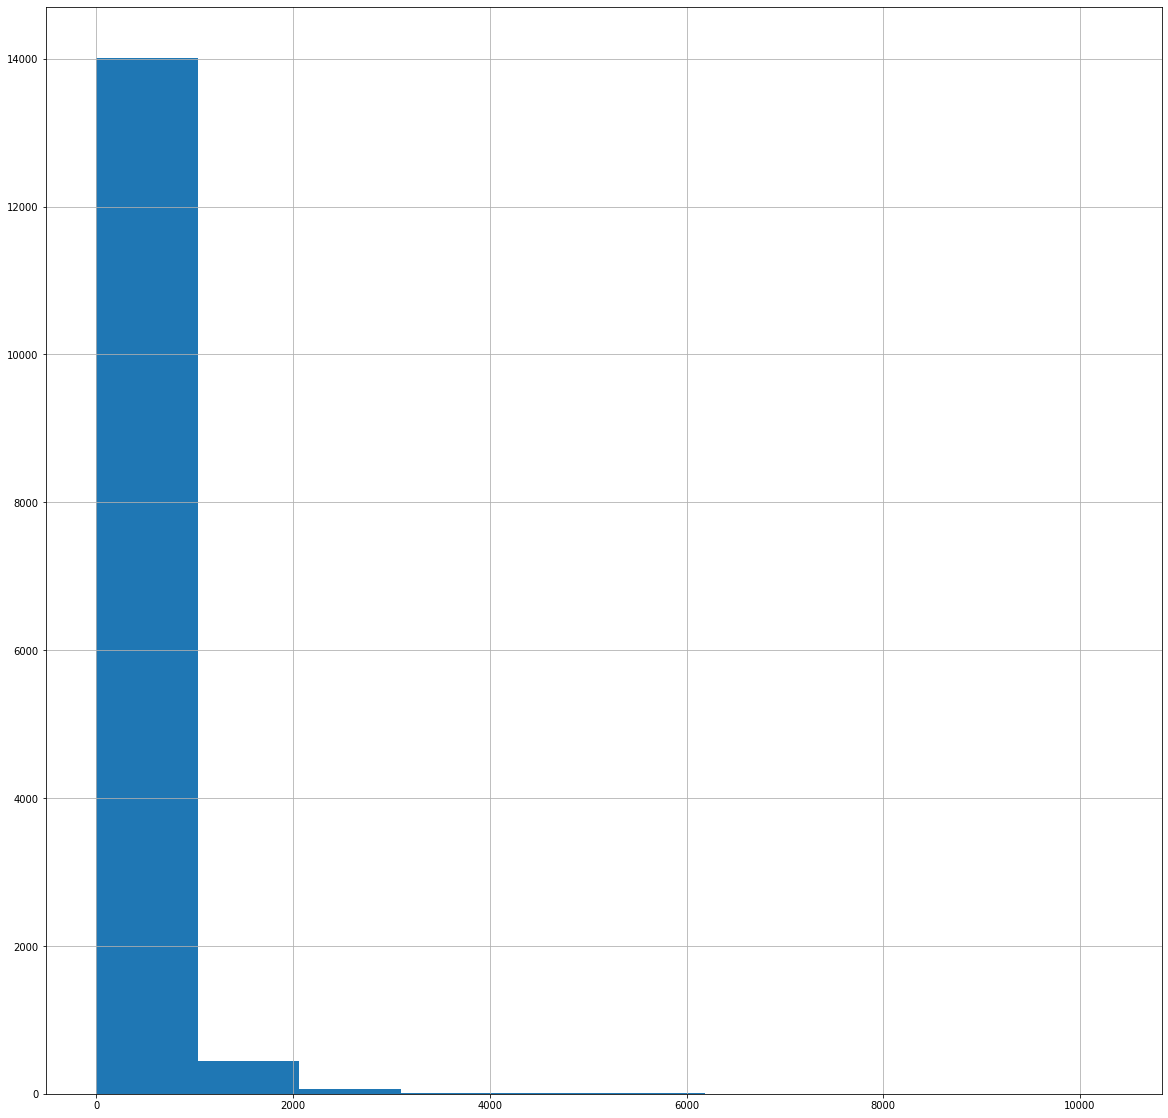

In [153]:
# text lenghth analysis
#
#distribution of text
data_corpus2['review_body'].str.len().hist()

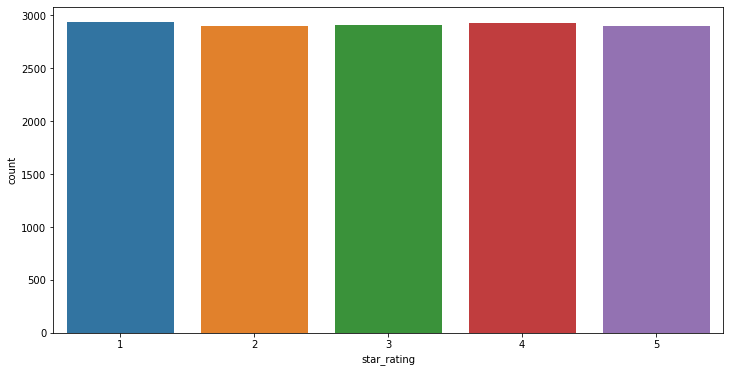

In [154]:
plt.figure(figsize=(12,6))     #width and height
sns.countplot(x='star_rating',data=data_corpus2)

Word Cloud

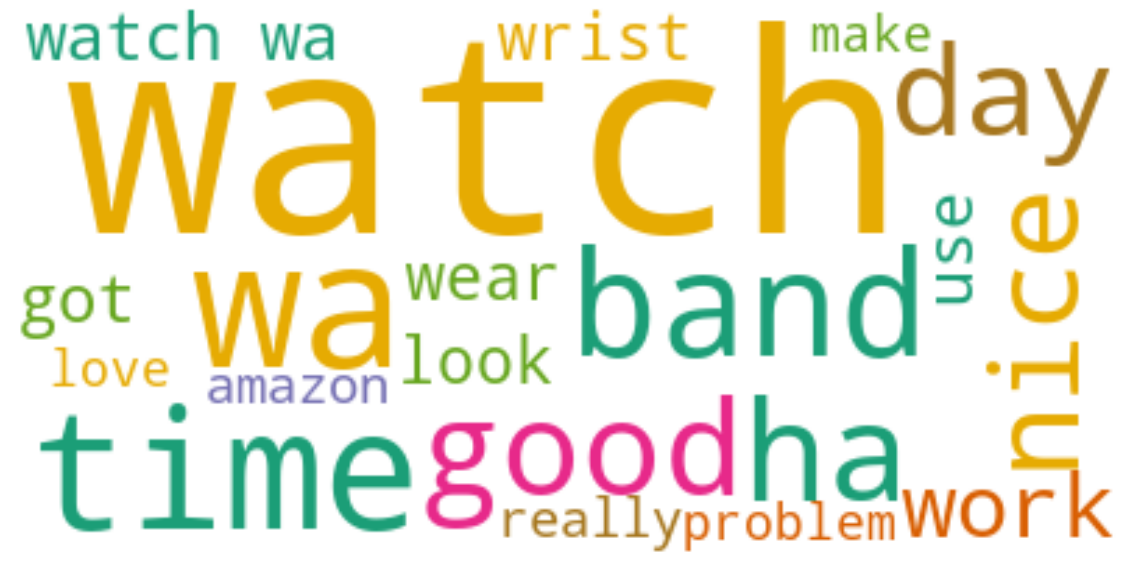

In [155]:
stop_words = text.ENGLISH_STOP_WORDS

wc = WordCloud(stopwords=None, background_color="white", colormap="Dark2",
               max_font_size=100, random_state=42, max_words=20)

plt.rcParams['figure.figsize'] = [20, 20]

all_feedback = data_corpus['review_body'].str.cat(sep=' ')

stopwords = stop_words
querywords = all_feedback.split()

resultwords  = [word for word in querywords if word.lower() not in stopwords]
result = ' '.join(resultwords)

wc.generate(result)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [156]:
def word_cloud_view(selected_rating):

  selected_rating = int(selected_rating)

  feedback_rating_two = data_corpus[data_corpus['star_rating']==selected_rating]['review_body'].str.cat(sep=' ')

  stopwords = stop_words
  querywords = all_feedback.split()

  resultwords  = [word for word in querywords if word.lower() not in stopwords]
  result = ' '.join(resultwords)

  wc.generate(result)
  plt.imshow(wc, interpolation="bilinear")
  plt.axis("off")
  plt.show()

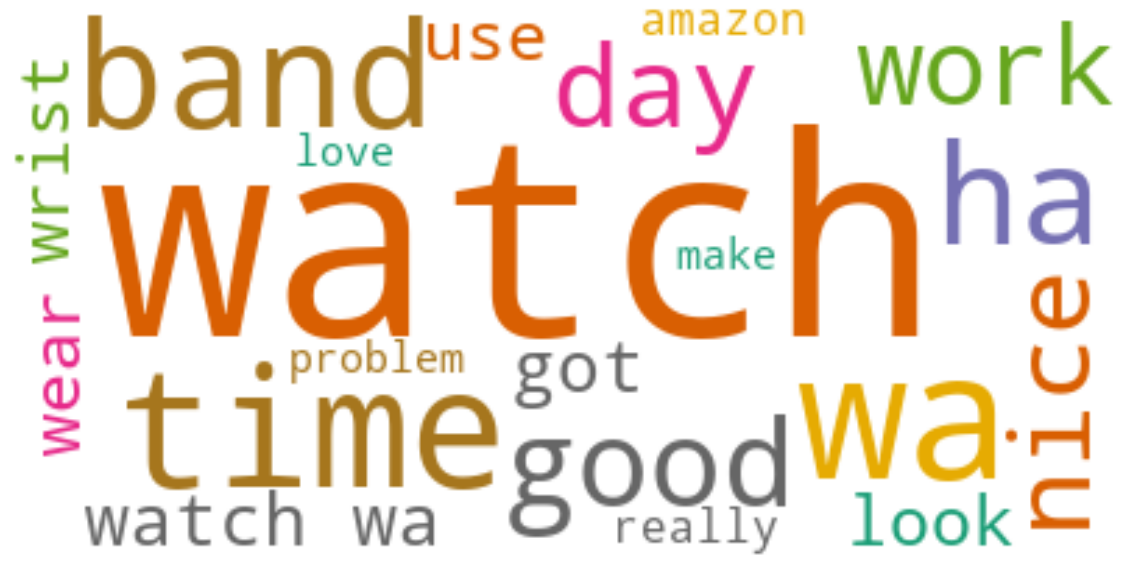

In [157]:
word_cloud_view(1)

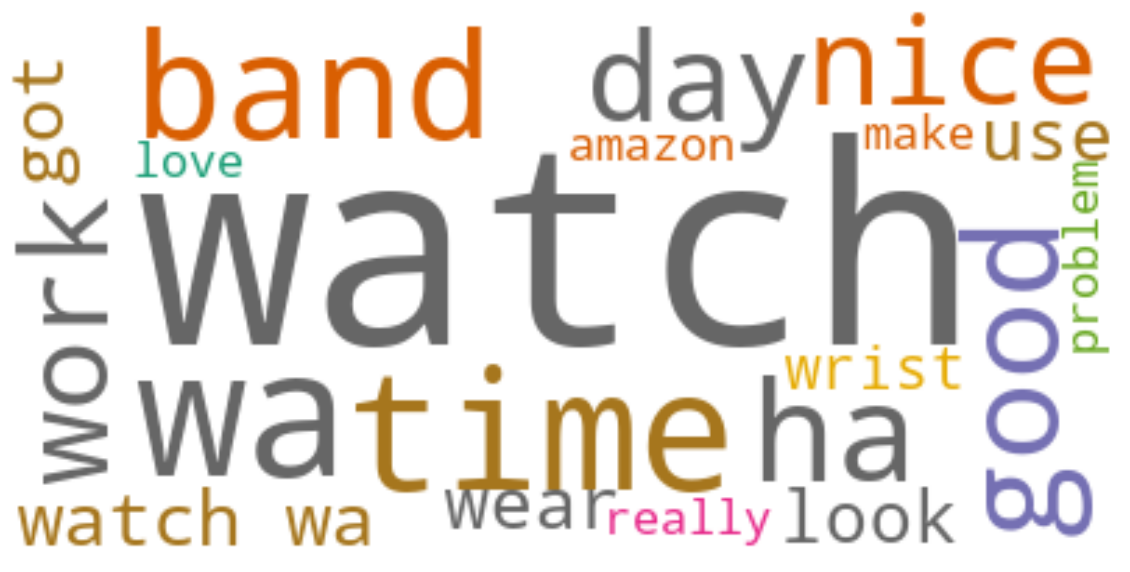

In [158]:
word_cloud_view(2)

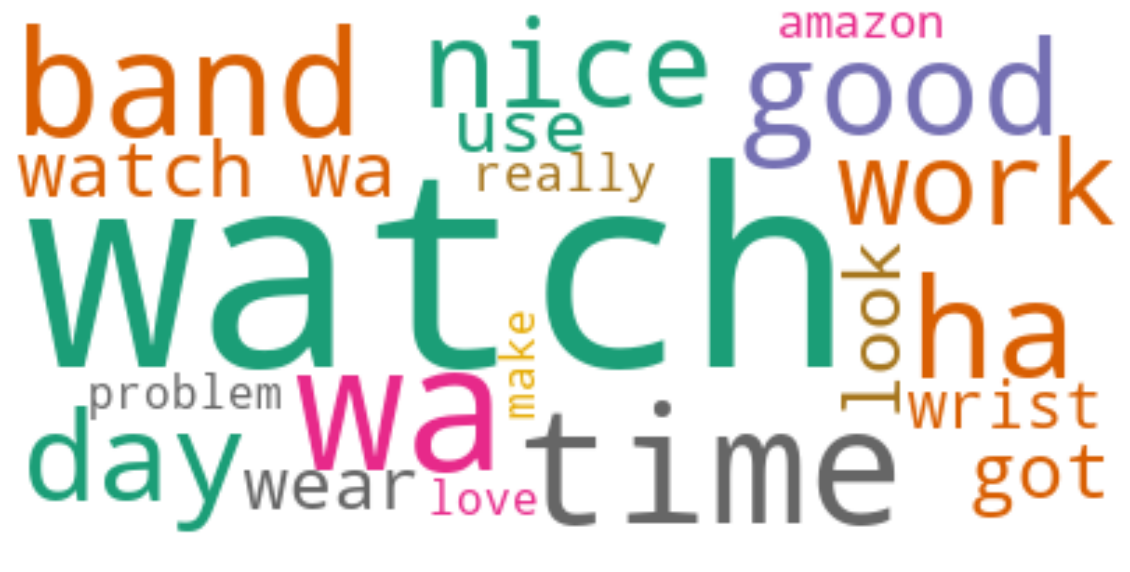

In [159]:
word_cloud_view(3)

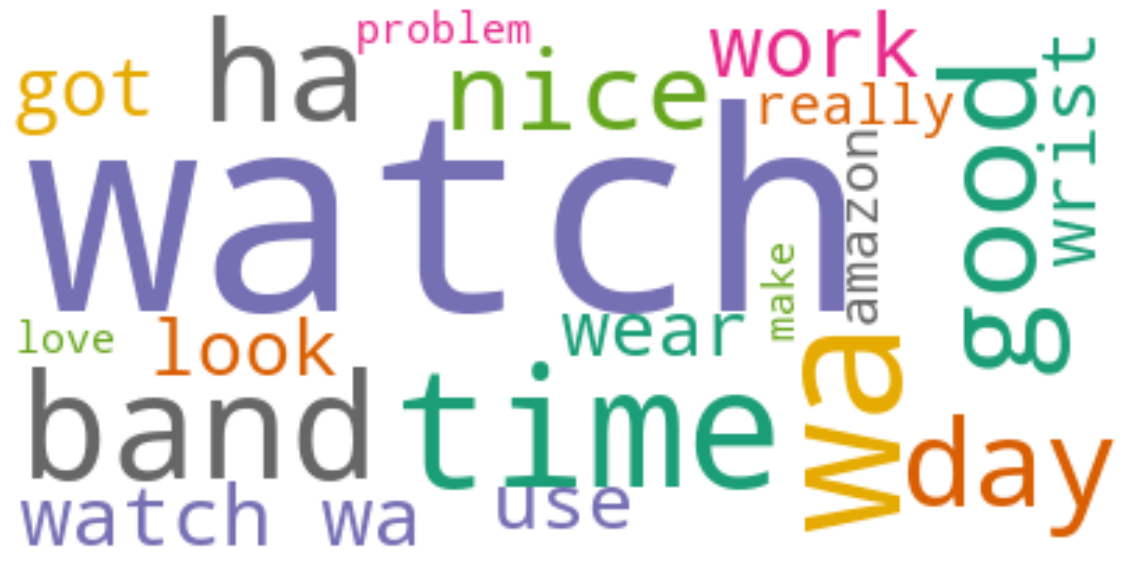

In [160]:
word_cloud_view(4)

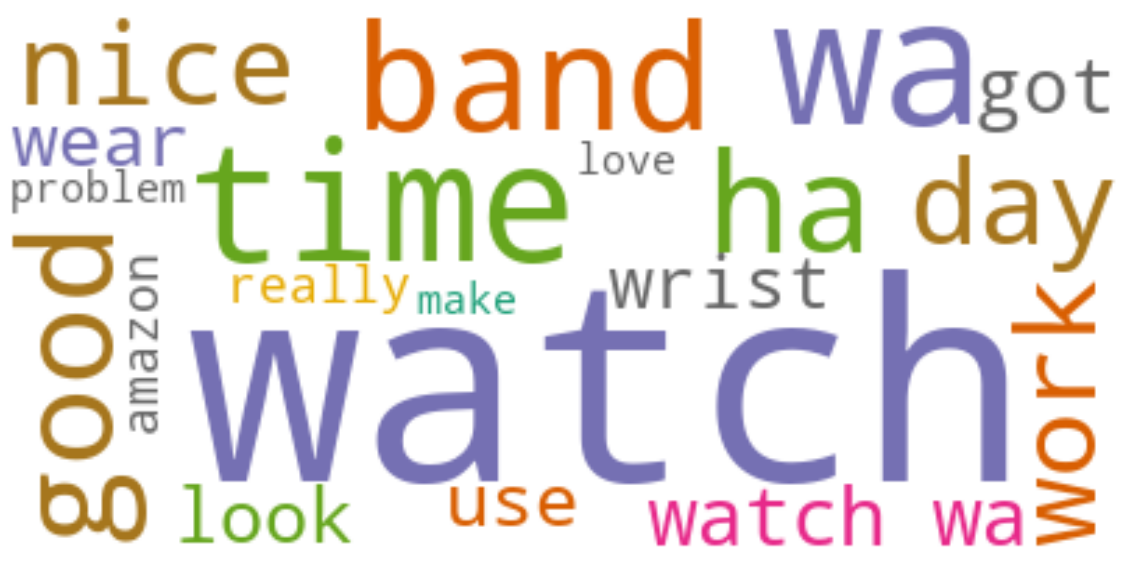

In [161]:
word_cloud_view(5)